# Chebychev polynomial and spline approximantion of various functions

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demapp05.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2021-Oct-01</i>
<hr>

## About

Demonstrates Chebychev polynomial, cubic spline, and linear spline approximation for the following functions
\begin{align}
    y &= 1 + x + 2x^2 - 3x^3 \\
    y &= \exp(-x) \\
    y &= \frac{1}{1+25x^2} \\
    y &= \sqrt{|x|} 
\end{align}

## Initial tasks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from compecon import BasisChebyshev, BasisSpline, nodeunif

### Functions to be approximated

In [2]:
funcs = [lambda x: 1 + x + 2 * x ** 2 - 3 * x ** 3,
         lambda x: np.exp(-x),
         lambda x: 1 / ( 1 + 25 * x ** 2),
         lambda x: np.sqrt(np.abs(x))]

fst = ['$y = 1 + x + 2x^2 - 3x^3$', '$y = \exp(-x)$', 
       '$y = 1/(1+25x^2)$', '$y = \sqrt{|x|}$']

Set degree of approximation and endpoints of approximation interval

In [3]:
n = 7   # degree of approximation
a = -1  # left endpoint
b = 1   # right endpoint

Construct uniform grid for error ploting

In [4]:
x = np.linspace(a, b, 2001)

In [5]:
def subfig(f,  title):
   
    # Construct interpolants
    C = BasisChebyshev(n, a, b, f=f)
    S = BasisSpline(n, a, b, f=f)
    L = BasisSpline(n, a, b, k=1, f=f)
    
    data = pd.DataFrame({
        'actual': f(x),
        'Chebyshev': C(x),
        'Cubic Spline': S(x),
        'Linear Spline': L(x)},
        index = x)

    fig1, axs = plt.subplots(2,2, figsize=[12,6], sharex=True, sharey=True)
    fig1.suptitle(title)    
    data.plot(ax=axs, subplots=True)

    errors = data[['Chebyshev', 'Cubic Spline']].subtract(data['actual'], axis=0)
    
    fig2, ax = plt.subplots(figsize=[12,3])
    fig2.suptitle("Approximation Error")    
    errors.plot(ax=ax)
    


## Polynomial 
$y = 1 + x + 2x^2 - 3x^3$

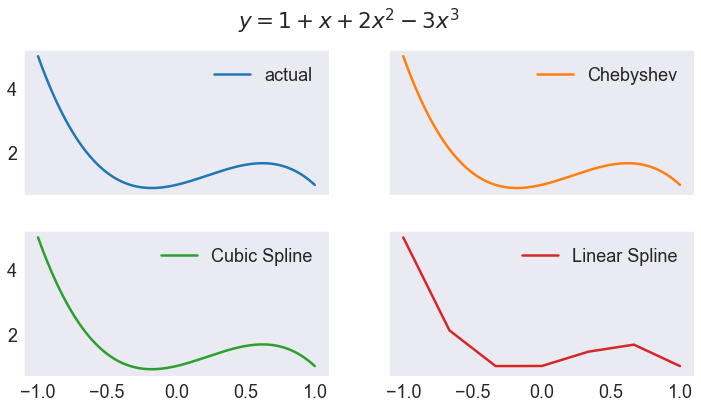

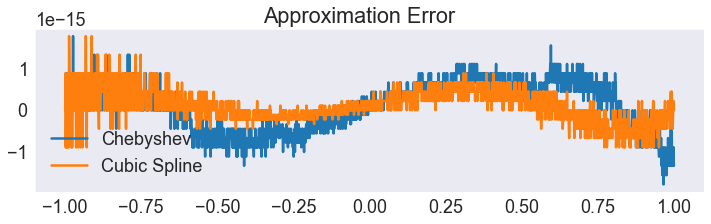

In [6]:
subfig(lambda x: 1 + x + 2*x**2 - 3*x**3, '$y = 1 + x + 2x^2 - 3x^3$')

## Exponential
$y = \exp(-x)$

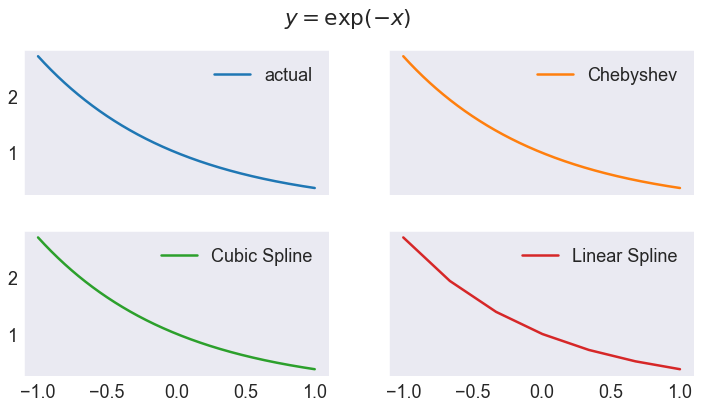

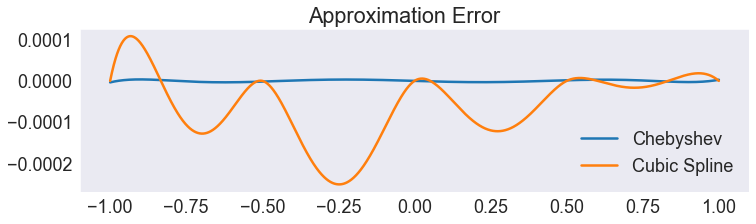

In [7]:
subfig(lambda x: np.exp(-x),'$y = \exp(-x)$')

## Rational
$y = 1/(1+25x^2)$

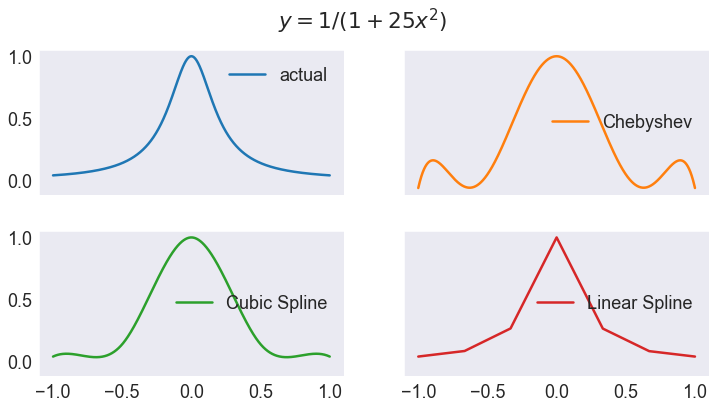

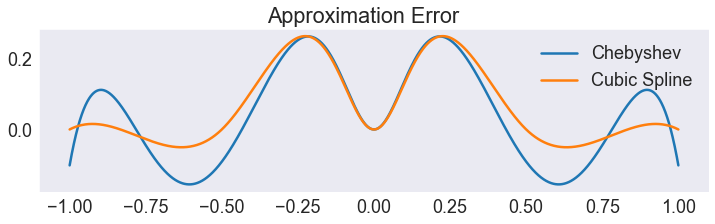

In [8]:
subfig(lambda x: 1 / ( 1 + 25 * x ** 2),'$y = 1/(1+25x^2)$')

## Kinky
$y = \sqrt{|x|}$

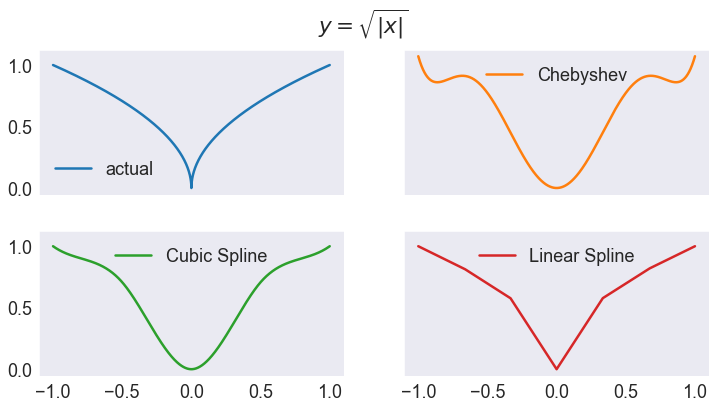

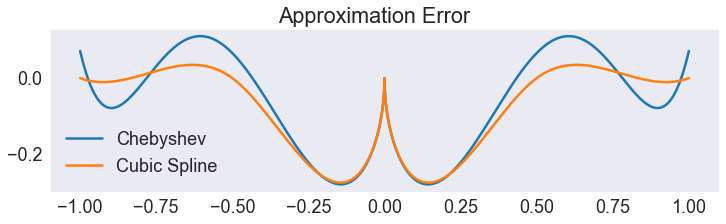

In [9]:
subfig(lambda x: np.sqrt(np.abs(x)), '$y = \sqrt{|x|}$')